In [ ]:
import pandas as pd
import numpy as np
import os


In [ ]:
df = pd.read_csv( '/content/sample_data/rating.csv' , sep=';' )

In [ ]:
df

,Review,Star
0,Sistem online tapi website sangat lemot padaha...,0
1,Pelayanan lama banget. Udah jam 8.20 loket mas...,0
2,"susah banget dihubunginnya, bingung harus hubu...",0
3,percuma online gak bakalan bisa solusi nya cum...,0
4,Prosesnya berbelit. Harus daftar online untuk...,0
...,...,...
985,I like it\n(Diterjemahkan oleh Google)\nsaya s...,1
986,ok\n(Diterjemahkan oleh Google)\nbaik,1
987,Bad services\n(Diterjemahkan oleh Google)\nLay...,0
988,(Diterjemahkan oleh Google) buat ktp panjang k...,0


In [ ]:
#df.to_csv("dataset_pilkada_ok.csv")

In [ ]:
df['label'] = df['Star'].astype(np.int64)
#df = df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df.dtypes

Review    object
Star       int64
label      int64
dtype: object

In [ ]:
import re
#menghapus RT
df.Review = df.Review.str.replace(r'RT', '')
#menghapus \n
df.Review = df.Review.str.replace(r'\n', '')
#menghapus link
df.Review = df.Review.str.replace(r'https?:\/\/.*[\r\n]*',' ')
#menghapus tanda mata uang dolar dll
df.Review = df.Review.str.replace(r'\$\w*',' ')

In [ ]:
#lower case semua text
df['Review'] = df['Review'].str.lower()

In [ ]:
df.tail()

,Review,Star,label
985,i like it(diterjemahkan oleh google)saya suka itu,1,1
986,ok(diterjemahkan oleh google)baik,1,1
987,bad services(diterjemahkan oleh google)layanan...,0,0
988,(diterjemahkan oleh google) buat ktp panjang k...,0,0
989,(diterjemahkan oleh google) tidak(asli)pas,1,1


In [ ]:
df.Review.iloc[1]

'pelayanan lama banget. udah jam 8.20 loket masih kosong. nggak tau lagi deh mau komen apa. protokol kesehatan tidak berjalan sama sekali. cek suhu serta masker gk diterapkan... saya dateng sama istri saya disuruh nunggu luar satu... sebelah saya segambreng sekeluarga masuk aman2 aja. padahal cuma ngurus kk doang satu.'

In [ ]:
a = df['Star'].unique()
print(sorted(a))

[0, 1]


In [ ]:
    #rubah jadi array numpy, supaya bisa dilakukan modeling
    from sklearn.model_selection import train_test_split
    kalimat = df['Review'].values
    y = df['label'].values
    kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [ ]:
    
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    

     #tokeninzing menjadi perkata, dalma bentuk array
    tokenizer = Tokenizer(num_words=250, oov_token='x')
    tokenizer.fit_on_texts(kalimat_latih) 
    tokenizer.fit_on_texts(kalimat_test)
    
     #kita pecah perkalimat
    sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
    sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
     #kita bikin padding supaya setiap kalimat memiliki dimensi panjang yg sama
    padded_latih = pad_sequences(sekuens_latih) 
    padded_test = pad_sequences(sekuens_test)

    padded_latih.shape
    voc_size = padded_latih.max()+1
    print(voc_size)

567


In [ ]:
    #membuat model Neural Network
    import tensorflow as tf
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(voc_size, 16, input_length=20),
        tf.keras.layers.LSTM(64),
        # tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    # #membuat model Neural Network
    # import tensorflow as tf
    # model = tf.keras.Sequential([
    #     tf.keras.layers.Embedding(voc_size, 16, input_length=20),
    #     tf.keras.layers.GlobalAveragePooling1D(),
    #     tf.keras.layers.Dense(24, activation='relu'),
    #     tf.keras.layers.Dense(1, activation='sigmoid')
    # ])
    # model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
    #melakukan pelatihan model NN sebanyak 30 kali epoch
    num_epochs = 30
    history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                        validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 3s - loss: 0.6594 - accuracy: 0.6629 - val_loss: 0.6077 - val_accuracy: 0.7020
Epoch 2/30
25/25 - 1s - loss: 0.6057 - accuracy: 0.6692 - val_loss: 0.6177 - val_accuracy: 0.6313
Epoch 3/30
25/25 - 1s - loss: 0.5928 - accuracy: 0.6932 - val_loss: 0.5902 - val_accuracy: 0.6818
Epoch 4/30
25/25 - 1s - loss: 0.5701 - accuracy: 0.7109 - val_loss: 0.5719 - val_accuracy: 0.6970
Epoch 5/30
25/25 - 1s - loss: 0.5298 - accuracy: 0.7361 - val_loss: 0.5672 - val_accuracy: 0.7121
Epoch 6/30
25/25 - 1s - loss: 0.4739 - accuracy: 0.7753 - val_loss: 0.6417 - val_accuracy: 0.7222
Epoch 7/30
25/25 - 1s - loss: 0.4250 - accuracy: 0.7866 - val_loss: 0.5251 - val_accuracy: 0.7424
Epoch 8/30
25/25 - 1s - loss: 0.3890 - accuracy: 0.8144 - val_loss: 0.5097 - val_accuracy: 0.7727
Epoch 9/30
25/25 - 1s - loss: 0.3525 - accuracy: 0.8359 - val_loss: 0.6383 - val_accuracy: 0.7677
Epoch 10/30
25/25 - 1s - loss: 0.3132 - accuracy: 0.8573 - val_loss: 0.5994 - val_accuracy: 0.7879
Epoch 11/30
25/25 -

In [ ]:
import pickle
weigh = model.get_weights();    pklfile= "modelweights.pkl"

fpkl= open(pklfile, 'wb')    #Python 3     
pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
fpkl.close()

model.save("my_model.h5") #using h5 extension

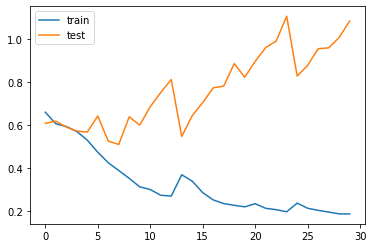

In [ ]:
#Tampilkan loss dari data training dan testing dalam bentuk plot
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

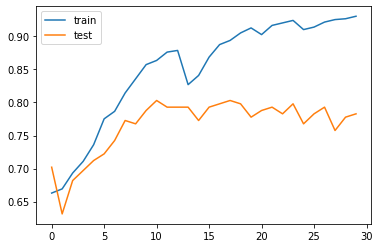

In [ ]:
#Tampilkan loss dari data training dan testing dalam bentuk plot
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence



def predict_sentimen(kata):
    coba =[]
    kata = kata.replace('RT', ' ')
    kata = kata.replace('\n', ' ')
    kata = kata.replace('https?:\/\/.*[\r\n]*', ' ')
    kata = str.lower(kata)
    coba.append(kata)
    tokenizer.fit_on_texts(coba) 
    sequence_coba = tokenizer.texts_to_sequences(coba)
    padded_coba = pad_sequences(sequence_coba) 
    # padded_coba
    coba_hasil = sequence.pad_sequences(padded_coba)
    hasil_prediksi = model.predict(coba_hasil)[0][0]
    if hasil_prediksi > 0.6:
        sentimen = "Positif"
    else:
        sentimen = "Negatif"
    print("Kalimat :\n", kata)
    print("Sentimen :\n", sentimen)
    print("Akurasi prediksi :\n",hasil_prediksi)


input_tweet = input("Masukkan kalimat/tweet yang ingin anda analisa sentimennya :")
predict_sentimen(input_tweet)

Masukkan kalimat/tweet yang ingin anda analisa sentimennya :kurang memuasakan
Kalimat :
 kurang memuasakan
Sentimen :
 Negatif
Akurasi prediksi :
 0.011075556
